<h2 style = "color : Brown"> AIRBNB CASE STUDY - STORY TELLING </h2>

#### PROBLEM STATEMENT :

For the past few months, Airbnb has seen a major decline in revenue.

The different leaders at Airbnb want to understand some important insights based on various attributes in the dataset so as to increase the revenue such as -

1. Which type of hosts to acquire more and where?
2. The categorisation of customers based on their preferences.
3. What are the neighbourhoods they need to target?
4. What is the pricing ranges preferred by customers?
5. The various kinds of properties that exist w.r.t. customer preferences.
6. Adjustments in the existing properties to make it more customer-oriented.
7. What are the most popular localities and properties in New York currently?
8. How to get unpopular properties more traction?

You still need to further understand the data and analyse important insights for the audience

In [1]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Read the csv file using 'read_csv'.  

df = pd.read_csv('AB_NYC_2019.csv')

#### Analysing the dataset

In [4]:
# Checking the number of rows and columns in the dataset

df.shape

(48895, 16)

> There are totals of 48895 rows an 16 columns in the dataset.

In [5]:
# Check the column-wise info and the data type of the columns

df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
# Checking the unique values in every columns

df.nunique()

id                                48895
name                              47896
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [7]:
# Checking the duplicated values in every columns

df.duplicated().sum()

0

> There are no duplicated values in the dataset, thus we can just leave it as it is.

In [8]:
# Analysing the first 5 rows of the datasets

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


### Checking the Missing Values

In [9]:
# Checking the percentage of null values of the dataset

null = round(df.isna().sum()/len(df)*100,2)
null.sort_values(ascending=False)

last_review                       20.56
reviews_per_month                 20.56
host_name                          0.04
name                               0.03
id                                 0.00
host_id                            0.00
neighbourhood_group                0.00
neighbourhood                      0.00
latitude                           0.00
longitude                          0.00
room_type                          0.00
price                              0.00
minimum_nights                     0.00
number_of_reviews                  0.00
calculated_host_listings_count     0.00
availability_365                   0.00
dtype: float64

In [10]:
# Dropping redundant and unnecessary columns

df.drop(['id','name'],axis=1, inplace=True)
df.isnull().sum()

host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [11]:
# Dropping the last_review columns due to its redundancy

df.drop(['last_review'],axis=1, inplace=True)
df.isnull().sum()

host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

> After dropping the last_review column, the only column we need to analyse further is reviews_per_month column.

##### Reviews_per_month column

In [12]:
# Checking the reviews_per_month columns

df.reviews_per_month.describe()

count    38843.000000
mean         1.373221
std          1.680442
min          0.010000
25%          0.190000
50%          0.720000
75%          2.020000
max         58.500000
Name: reviews_per_month, dtype: float64

> The mean value for the `Reviews_per_month` is 1.37 review, and the median is 0.72 while the max review is 58.5.

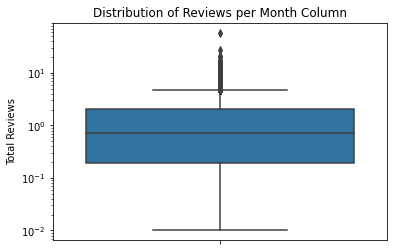

In [13]:
# Distribution of data in the column reviews_per_month

sns.boxplot(data= df, y='reviews_per_month')
plt.title('Distribution of Reviews per Month Column')
plt.yscale('log')
plt.ylabel('Total Reviews')
plt.show()

In [14]:
# Analysing the reasons of higher null values in the column against review per month

df[['number_of_reviews','reviews_per_month']][df['reviews_per_month'].isnull()].head()


,number_of_reviews,reviews_per_month
2,0,NaN
19,0,NaN
26,0,NaN
36,0,NaN
38,0,NaN


> * As we can see, the values in the reviews_per_month is related with the number_of_reviews column, where there is **no review being added which is equivalent to null values in the reviews per month**. 
> * Thus it is logically concluded to replace those null values in the column with **0** instead, which we will proceed in the next step.

array([[<AxesSubplot:title={'center':'reviews_per_month'}>]], dtype=object)

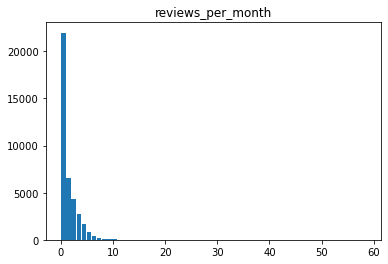

In [15]:
df.hist(column = 'reviews_per_month', bins = 60, grid = False, rwidth = .9)

* The distribution of the reviews are more focusing within range of 0-6 reviews as per above histogram.

In [16]:
# Replacing the null values in reviews_per_month with 0

df['reviews_per_month'].fillna(value=0, inplace=True)

# Checking the value after replacing with 0

df['reviews_per_month'].isnull().sum()

0

In [17]:
# Final rows and columns

df.shape

(48895, 13)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   host_name                       48874 non-null  object 
 2   neighbourhood_group             48895 non-null  object 
 3   neighbourhood                   48895 non-null  object 
 4   latitude                        48895 non-null  float64
 5   longitude                       48895 non-null  float64
 6   room_type                       48895 non-null  object 
 7   price                           48895 non-null  int64  
 8   minimum_nights                  48895 non-null  int64  
 9   number_of_reviews               48895 non-null  int64  
 10  reviews_per_month               48895 non-null  float64
 11  calculated_host_listings_count  48895 non-null  int64  
 12  availability_365                

#### Numerical Variables

In [19]:
# Understanding the numerical variable

df_num = df[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']]
df_num.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,48895.0,152.720687,240.154170,0.0,69.00,106.00,175.00,10000.0
minimum_nights,48895.0,7.029962,20.510550,1.0,1.00,3.00,5.00,1250.0
number_of_reviews,48895.0,23.274466,44.550582,0.0,1.00,5.00,24.00,629.0
reviews_per_month,48895.0,1.090910,1.597283,0.0,0.04,0.37,1.58,58.5
calculated_host_listings_count,48895.0,7.143982,32.952519,1.0,1.00,1.00,2.00,327.0
availability_365,48895.0,112.781327,131.622289,0.0,0.00,45.00,227.00,365.0


> * Price 
>> The mean value for price column is 152.72usd, median is at 106usd and the maximum price is 10000.00 which is clearly an outliers.
> * Minimum nights 
>> The mean value for the minimum night is 7.03 days, while there are customers whom even stayed for 1250.00 days which is in this case, is an outliers.
> * Number of Reviews 
>> For the number of reviews, the mean values lies in  23.27 reviews, median is at 5.00.
> * Reviews per Month
>> For the number of reviews per months, the mean of the variable is at 1.09 reviews, median is at 0.37 and max number of reviews is at 58.5.
> * Calculated host listing account
>> This is an amount of listing per host, in this variable, 7.14 listing is the mean value, and the mximum listing up to per host.
> * Availability 365
>> For the number of days when listing is available, the mean value is at 112.78 days, median is at 45 days and maximum days is 365.0 days.

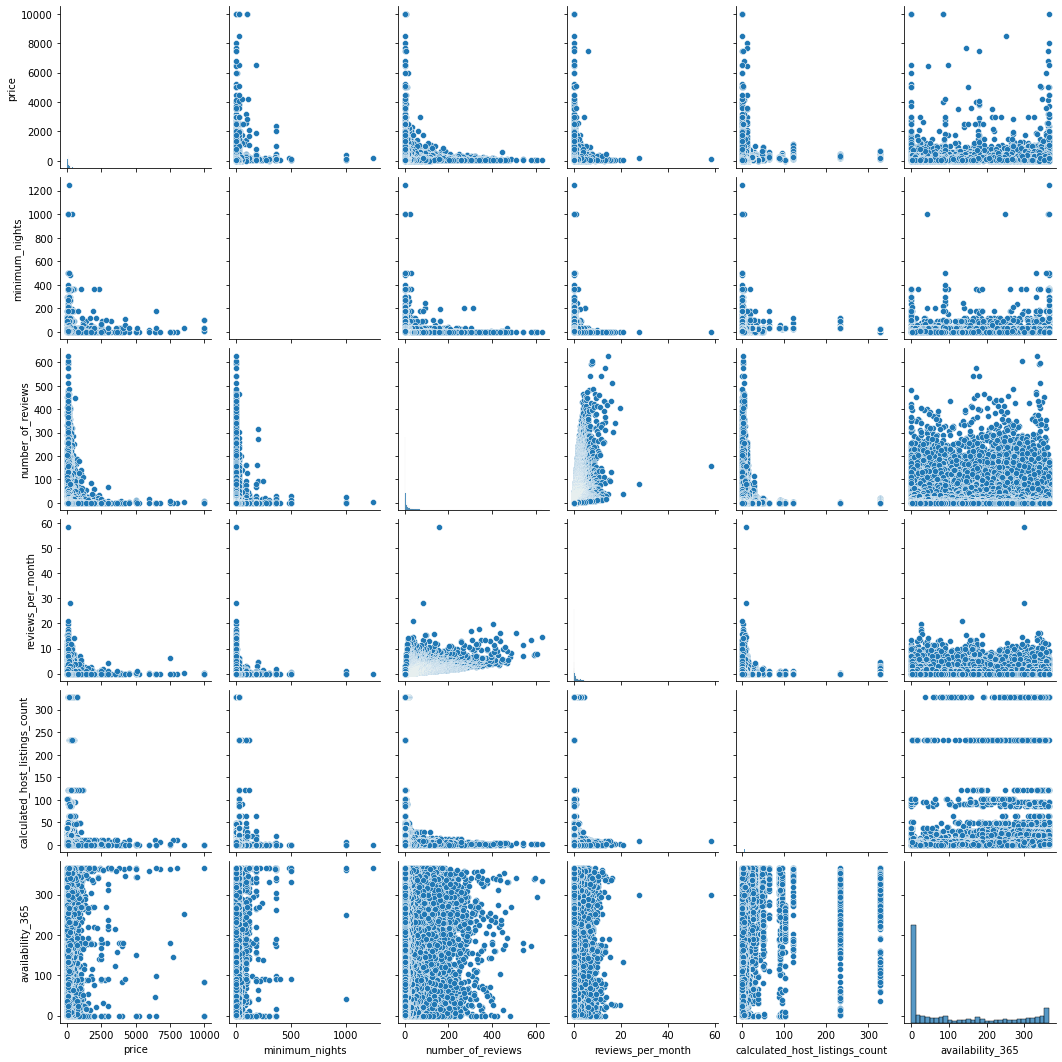

In [20]:
 # Plotting pair plot for the numeical variables

sns.pairplot(data=df, vars = df_num)
plt.show()

> Above pairplot shows the distribution of each variables, and it also show on the range of the values.

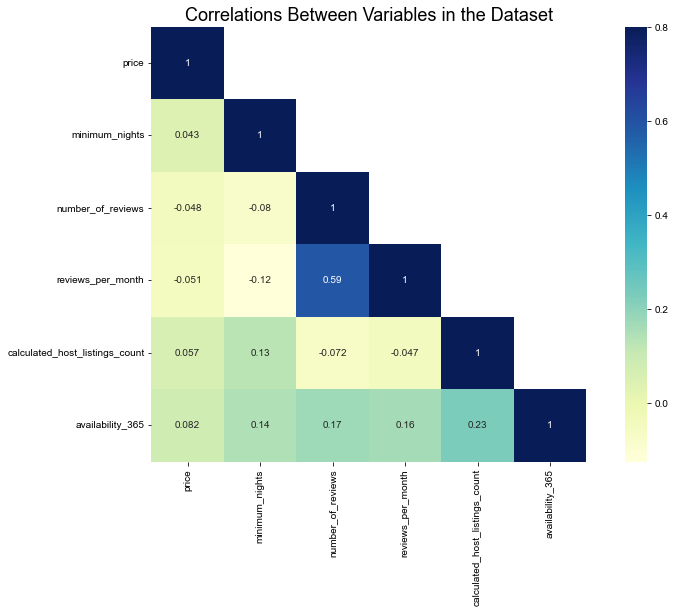

In [21]:
# Checking the correlation between variables

plt.figure(figsize=(14,8))
mask = np.array(df_num.corr())
mask[np.tril_indices_from(mask)] = False
sns.heatmap(df_num.corr(), mask = mask, vmax = .8, square =  True, annot=True, cmap='YlGnBu')

sns.set_style('whitegrid')
sns.set_context('talk')
plt.title('Correlations Between Variables in the Dataset')
plt.show()

> * There is 0.59 positive correlation between review per month vs number of review, followed by availability_365 vs price with 0.082 correlation.
> * Negatively correlated variables such as reviews_per_month vs minimum_nights with -0.12, and number_of_reviews vs minimum_nights with -0.08.

#### Checking the Outliers for Numerical Columns

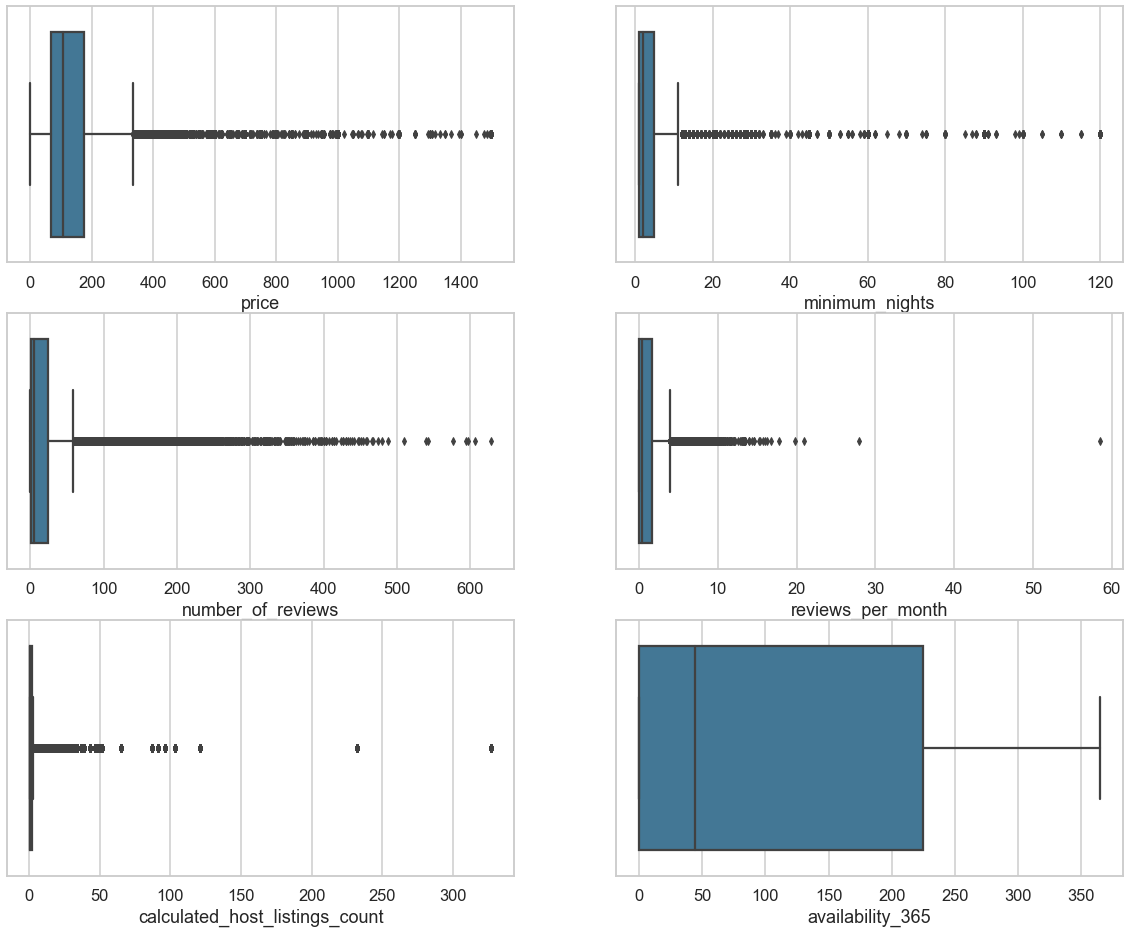

In [51]:
# Analysing outliers for numerical columms

plt.figure(figsize=(20,16))

for i in enumerate(df_num):
    plt.subplot(3,2, i[0]+1)
    sns.boxplot(x = i[1], data = df, palette='mako')

> From the above boxplot, we can summarize that:
> * There is an obvious outliers for the price column, 10000 usd is too costly and it is unaffordable for most number of people.
> * Same goes with the column minimum_nights where 1200 days which is equivalent to 3.28 years.

### Analysing and Treating the Outliers

####  1. Price column

In [23]:
# Analysing the description

df['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

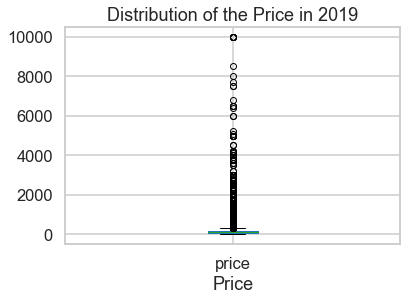

In [24]:
# Plotting boxplot to see the distribution of the data in the column

df.boxplot(column = 'price')

plt.xlabel('Price')
plt.title('Distribution of the Price in 2019')

plt.show()

In [25]:
# Binning the price column

df['price'].quantile([0,0.25,0.50,0.75,0.90,0.95,0.99,0.997])

0.000       0.0
0.250      69.0
0.500     106.0
0.750     175.0
0.900     269.0
0.950     355.0
0.990     799.0
0.997    1500.0
Name: price, dtype: float64

 > We will consider the values above 99.7% as an outliers, thus we will drop the values above 99.7% as per the rule of normal distribution.

In [26]:
# Dropping the value above 99.7 quantile.

df.drop(df[df['price'] > df['price'].quantile(0.997)].index, axis=0, inplace=True)

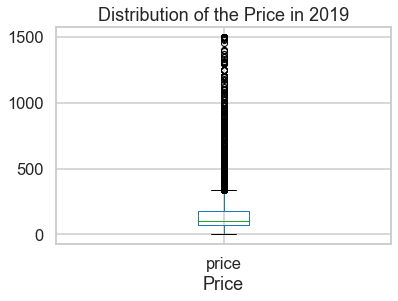

In [27]:
# Replotting the boxplot after the outlier treatments

df.boxplot(column = 'price')

plt.xlabel('Price')
plt.title('Distribution of the Price in 2019')

plt.show()

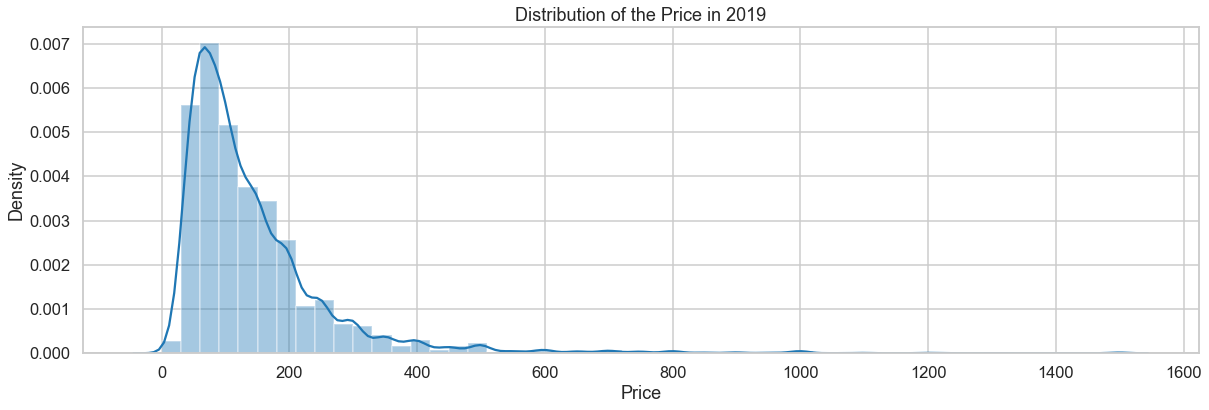

In [28]:
# Plotting the displot to see the distributions

plt.figure(figsize=(20,6))
sns.distplot(df['price'])

plt.xlabel('Price')
plt.title('Distribution of the Price in 2019')
plt.show()

>> After treating the outliers, based from the above graph, the price has been capped at the value of 1500usd as compared with 10000usd before the outlier treatments.

##### 2. Minimum Nights

In [29]:
# Analysing the description

df['minimum_nights'].describe()

count    48756.000000
mean         6.983612
std         20.327452
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

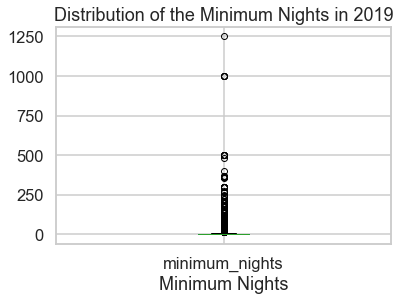

In [30]:
# Plotting boxplot to see the distribution of the data in the column

df.boxplot(column = 'minimum_nights')

plt.xlabel('Minimum Nights')
plt.title('Distribution of the Minimum Nights in 2019')

plt.show()

In [31]:
# Binning the Minimum Nights column

df['minimum_nights'].quantile([0,0.25,0.50,0.75,0.90,0.95,0.99,0.997])

0.000      1.00
0.250      1.00
0.500      3.00
0.750      5.00
0.900     28.00
0.950     30.00
0.990     42.45
0.997    120.00
Name: minimum_nights, dtype: float64

 > We will consider the values above 99.7% as an outliers, thus we will drop the values above 99.7% as per the rule of normal distribution.

In [32]:
# Dropping the value above 99.7 quantile.

df.drop(df[df['minimum_nights'] > df['minimum_nights'].quantile(0.997)].index, axis=0, inplace=True)

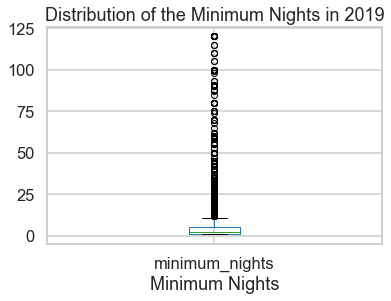

In [33]:
# Replotting the boxplot after the outlier treatments

df.boxplot(column = 'minimum_nights')

plt.xlabel('Minimum Nights')
plt.title('Distribution of the Minimum Nights in 2019')

plt.show()

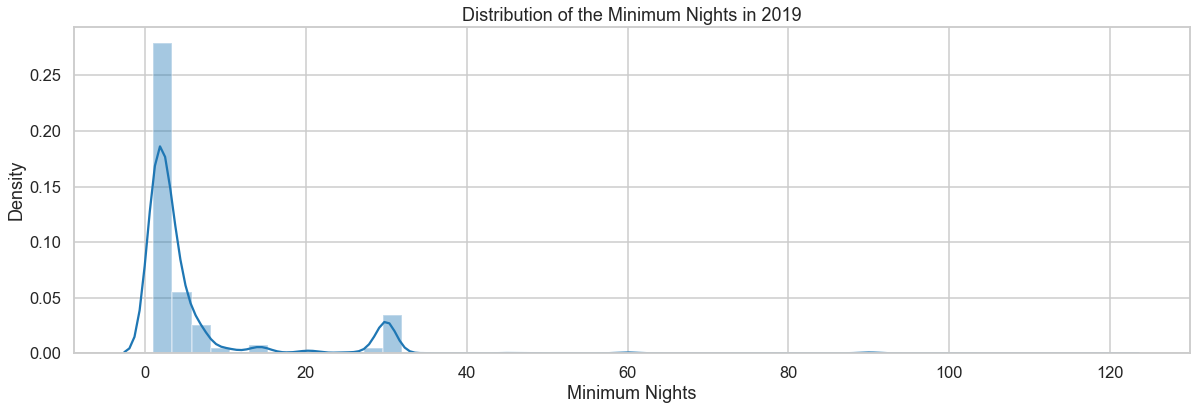

In [34]:
# Plotting the displot to see the distributions

plt.figure(figsize=(20,6))
sns.distplot(df['minimum_nights'])

plt.xlabel('Minimum Nights')
plt.title('Distribution of the Minimum Nights in 2019')
plt.show()

>> After replotting the boxplot and distribution plot, we can see that the value is being capped at 120 days, and the distribution can be clearly seen from the above graph.

### Categorical Variables

In [35]:
# Understanding the categorical variable

df_cat = df[['room_type','neighbourhood_group','neighbourhood']]


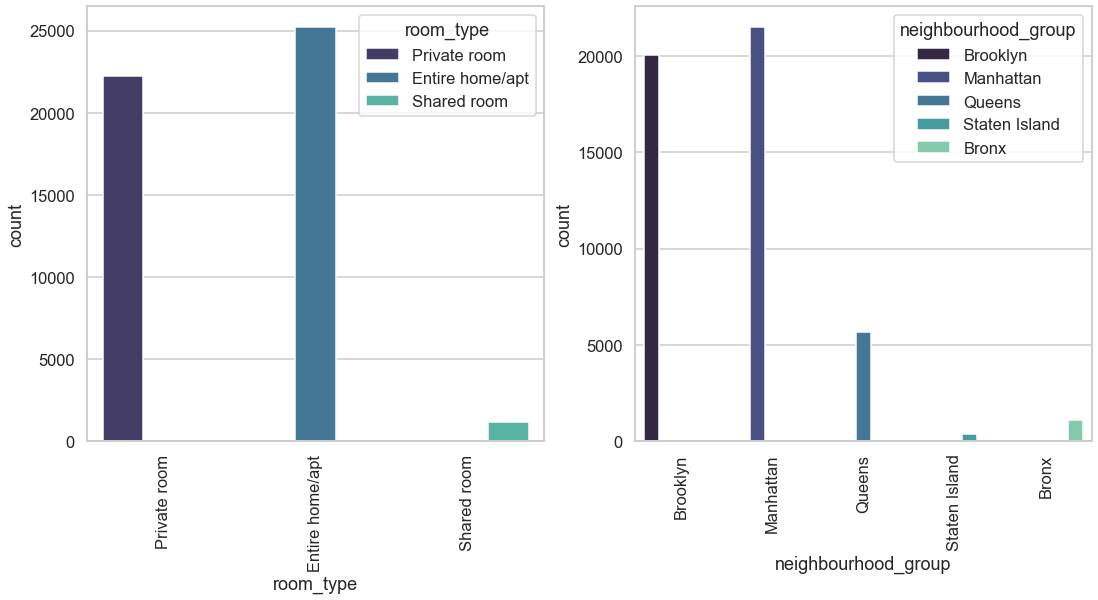

In [36]:
# Visualisation of the categorical variables

plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
sns.countplot(x = 'room_type',hue = 'room_type', data = df,palette="mako").tick_params(axis='x', rotation = 90)
plt.subplot(1,2,2)
sns.countplot(x='neighbourhood_group', hue = 'neighbourhood_group',data = df,palette="mako").tick_params(axis='x', rotation = 90)

sns.color_palette("tab10")

plt.show()

> * For the Room Type, ther are 3 types of values which are private room, entire home/ apt and shared room. Entire home/apt leads the column with 25000, followed by private room then shared room.
> * There are 5 types of neighbourhood group which are Brooklyn, Manhattan, Queens, Staten Island, and Bronx. Manhattan leads, followed by Brooklyn and Queens.
> * For the neighborhoud variable, there are too many unique values in the variable, thus it is not possible to plot a graph on the values, and it will not be readable as well.

In [37]:
# Unique value for the neighbourhood column

df['neighbourhood'].unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [38]:
# Checking the unique value in the room_type column

df['room_type'].value_counts()

Entire home/apt    25210
Private room       22254
Shared room         1158
Name: room_type, dtype: int64

In [39]:
# Checking the unique value in the neighbourhood column

df['neighbourhood'].value_counts()

Williamsburg          3902
Bedford-Stuyvesant    3703
Harlem                2648
Bushwick              2461
Hell's Kitchen        1948
                      ... 
Woodrow                  1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64

In [40]:
# Checking the unique value in the neighbourhood_group column

df['neighbourhood_group'].value_counts()

Manhattan        21486
Brooklyn         20023
Queens            5654
Bronx             1088
Staten Island      371
Name: neighbourhood_group, dtype: int64

#### Exporting the data to Excel

In [41]:
file_name = 'AB_NYC_2019_Updated.xlsx'
df.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.
